In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [ ]:
df = pd.read_csv('/content/filename.csv')
df.head()

,Unnamed: 0,temp(cel),mean_windspeed(km/hr),re_hum(%),cloud(okta),rain(mm),avg._no._rainyday,district,month_index
0,0,12.571663,4.861222,77.267091,1.525148,14.375759,0.9,Bhagalpur,1
1,1,16.876908,4.658724,76.001416,1.749436,13.976031,0.9,Bhagalpur,1
2,2,15.775776,3.505728,79.321824,1.713624,12.331613,0.9,Bhagalpur,1
3,3,12.903226,3.196545,79.323649,1.591761,12.337610,0.9,Bhagalpur,1
4,4,16.829754,4.926399,78.572965,1.469696,12.780349,0.9,Bhagalpur,1


In [ ]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Unnamed: 0,temp(cel),mean_windspeed(km/hr),re_hum(%),cloud(okta),rain(mm),avg._no._rainyday,district,month_index
0,262,20.014826,4.650373,57.180778,1.163022,7.046653,0.6,Muzaffarpur,3
1,351,26.913949,10.066652,80.792861,6.253036,290.868969,11.5,Raxaul,8
2,90,30.306989,4.536226,78.739710,4.735307,262.240458,10.6,Darbhanga,8
3,203,33.562987,5.922421,52.773886,0.675278,9.190852,0.6,jamui,4
4,29,34.583787,6.978946,67.697722,3.320547,63.926974,3.5,Bhagalpur,5


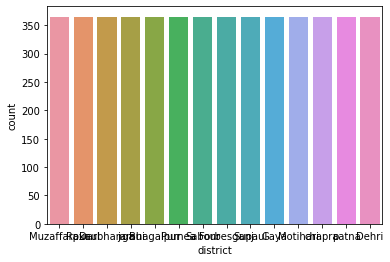

In [ ]:
import seaborn as sns
sns.countplot(x='district',data=df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             5110 non-null   int64  
 1   temp(cel)              5110 non-null   float64
 2   mean_windspeed(km/hr)  5110 non-null   float64
 3   re_hum(%)              5110 non-null   float64
 4   cloud(okta)            5110 non-null   float64
 5   rain(mm)               5110 non-null   float64
 6   avg._no._rainyday      5110 non-null   float64
 7   district               5110 non-null   object 
 8   month_index            5110 non-null   int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 359.4+ KB


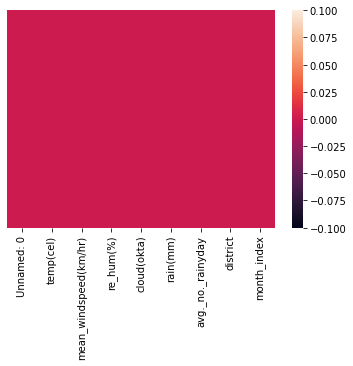

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False)

In [ ]:
X=df[['temp(cel)','mean_windspeed(km/hr)','re_hum(%)','cloud(okta)','rain(mm)','avg._no._rainyday','month_index']]
y =df['district']

In [ ]:
X

,temp(cel),mean_windspeed(km/hr),re_hum(%),cloud(okta),rain(mm),avg._no._rainyday,month_index
0,20.014826,4.650373,57.180778,1.163022,7.046653,0.6,3
1,26.913949,10.066652,80.792861,6.253036,290.868969,11.5,8
2,30.306989,4.536226,78.739710,4.735307,262.240458,10.6,8
3,33.562987,5.922421,52.773886,0.675278,9.190852,0.6,4
4,34.583787,6.978946,67.697722,3.320547,63.926974,3.5,5
...,...,...,...,...,...,...,...
5105,27.745641,7.573405,57.723849,1.182270,29.045037,1.9,5
5106,24.495833,4.047122,80.288719,1.288470,10.058863,0.8,2
5107,34.513800,8.148392,58.299125,0.598250,34.923545,2.2,5
5108,31.266483,5.530630,84.448139,1.827016,68.566743,2.5,10


In [ ]:
y

0       Muzaffarpur
1            Raxaul
2         Darbhanga
3             jamui
4         Bhagalpur
           ...     
5105         chapra
5106         Supaul
5107          jamui
5108         Supaul
5109          Dehri
Name: district, Length: 5110, dtype: object

In [ ]:

lb = preprocessing.LabelEncoder()
y=lb.fit_transform(y)
y

array([ 6,  8,  1, ..., 12, 10,  2])

In [ ]:
X = X.iloc[:,:].values
X

array([[ 20.01482632,   4.65037295,  57.18077785, ...,   7.04665328,
          0.6       ,   3.        ],
       [ 26.91394942,  10.06665176,  80.79286095, ..., 290.86896893,
         11.5       ,   8.        ],
       [ 30.30698876,   4.53622594,  78.73970985, ..., 262.2404584 ,
         10.6       ,   8.        ],
       ...,
       [ 34.51380037,   8.14839233,  58.29912482, ...,  34.92354487,
          2.2       ,   5.        ],
       [ 31.26648327,   5.5306298 ,  84.44813918, ...,  68.56674327,
          2.5       ,  10.        ],
       [ 22.2733901 ,   3.57867061,  62.38876676, ...,  13.5545475 ,
          1.4       ,   2.        ]])

In [ ]:
  
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
import joblib
filename = 'district.csv'
joblib.dump(classifier,filename)

['district.csv']

In [ ]:
model = joblib.load('district.csv')
y_pred = model.predict(x_test)
y_pred

array([ 2,  3,  4, ...,  6, 12,  5])

In [ ]:
score = model.score(x_test,y_test)
score

0.9694835680751174

In [ ]:
output = lb.inverse_transform(y_pred)
output

array(['Supaul', 'Supaul', 'Gaya', ..., 'Dehri', 'Motihari', 'Purnea'],
      dtype=object)